### CodersCave - Phase 1 Project

### Diabetes Prediction

Our second project is the Diabetes Prediction. We download the dataset from Kaggle.com and do our analysis and create the machine learniong model with the best accuracy on that. Our dataset contains the information of several male & females with different paramteres such bmi, age, hypertension etc. We analyse the data properly and choose the model having best accuracy. Our dataset contains the following columns:
 - gender                 
 - age                    
 - hypertension           
 - heart_disease          
 - smoking_history        
 - bmi                    
 - HbA1c_level            
 - blood_glucose_level    
 - diabetes 

#### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [2]:
df=pd.read_csv('F:\Internship - Data Science\diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
df.tail(10)  #last 10 rows of the dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
df.nunique() #checking the unique values in every column

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [5]:
df.columns #checking the columns of the dataset

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

#### A brief info about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Checking the null values

In [7]:
df.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<AxesSubplot:>

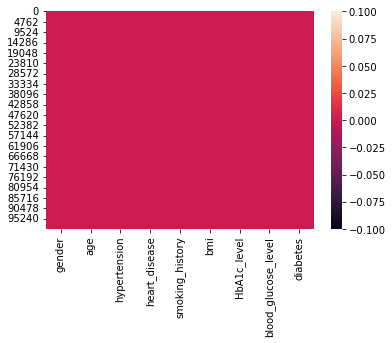

In [8]:
sns.heatmap(df.isnull())  # plotting the null values using heatmap

<AxesSubplot:xlabel='gender', ylabel='count'>

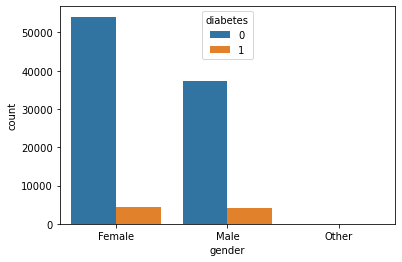

In [9]:
sns.countplot(df['gender'],hue=df['diabetes'])

We have almost equal no of male & females having the diabetes

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

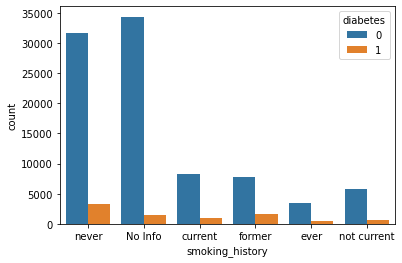

In [10]:
sns.countplot(df['smoking_history'],hue=df['diabetes'])

We don't have a direct relationship between smoking history and diabetes

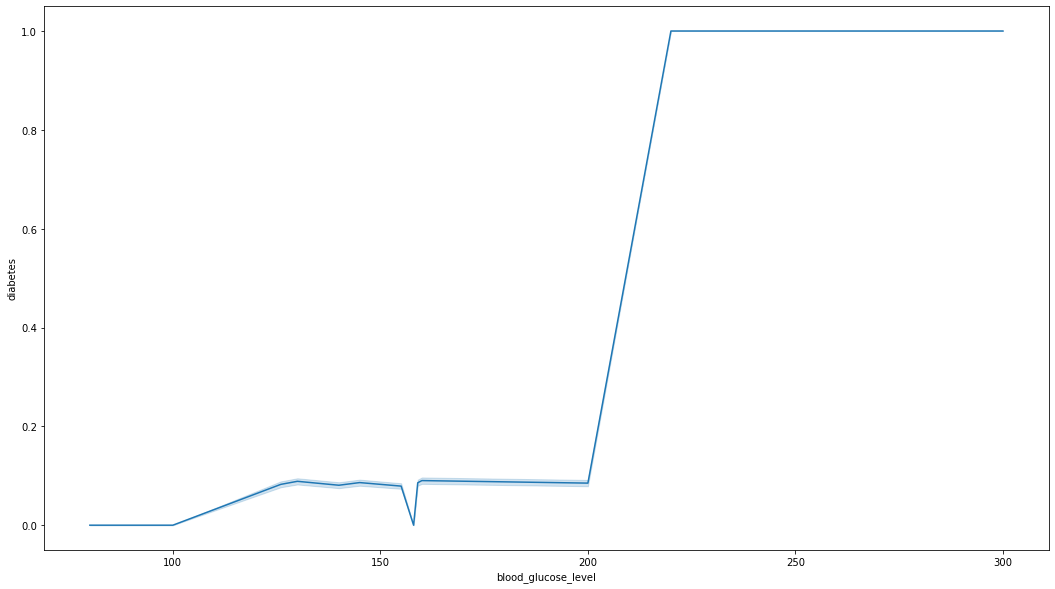

In [11]:
plt.figure(figsize=(18,10))
sns.lineplot(x="blood_glucose_level", y="diabetes", data=df)
plt.show()

The person having a high blood glucose level there is more chances of having diabetes

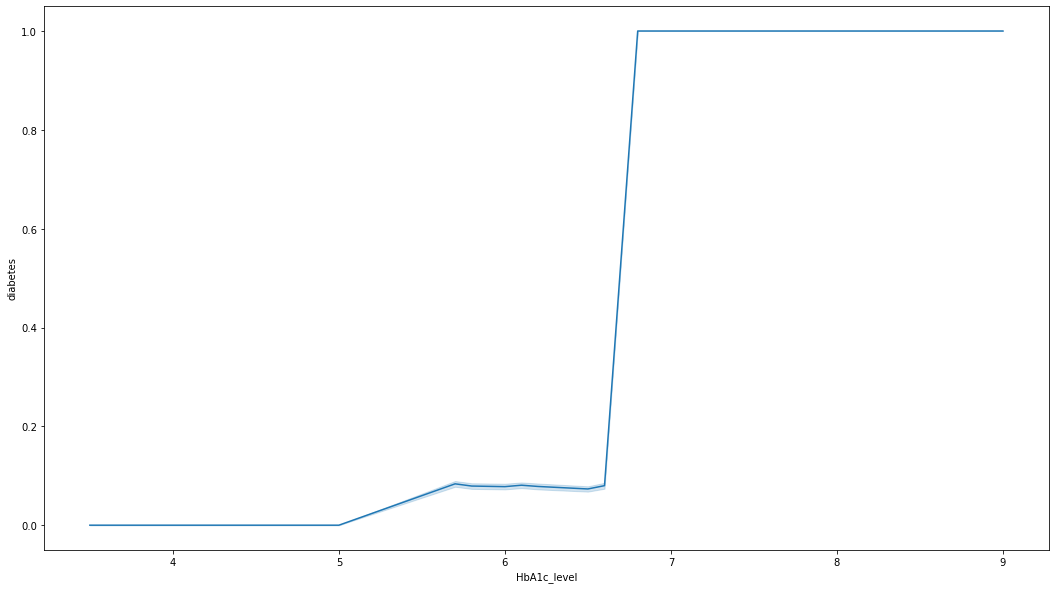

In [12]:
plt.figure(figsize=(18,10))
sns.lineplot(x="HbA1c_level", y="diabetes", data=df)
plt.show()

Person having a high Hb1Ac Level there is more chances of having diabetes

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

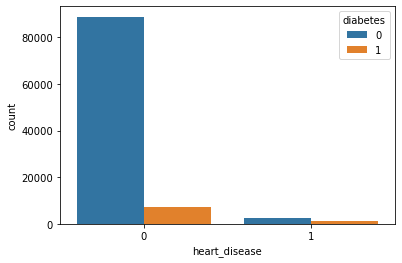

In [13]:
sns.countplot(df['heart_disease'],hue=df['diabetes'])

There is very low count of persons having heart disease also have the diabetes.

<AxesSubplot:xlabel='age', ylabel='diabetes'>

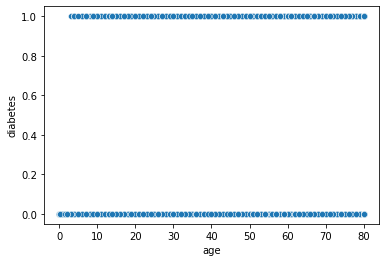

In [14]:
sns.scatterplot(df['age'],df['diabetes'])

There is no specific age when a person can have the diabetes

<AxesSubplot:xlabel='bmi', ylabel='diabetes'>

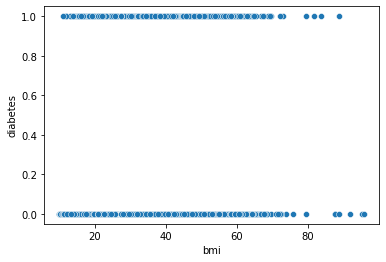

In [15]:
sns.scatterplot(df['bmi'],df['diabetes'])

We don't find any specific relaion between the bmi of a person and diabetes

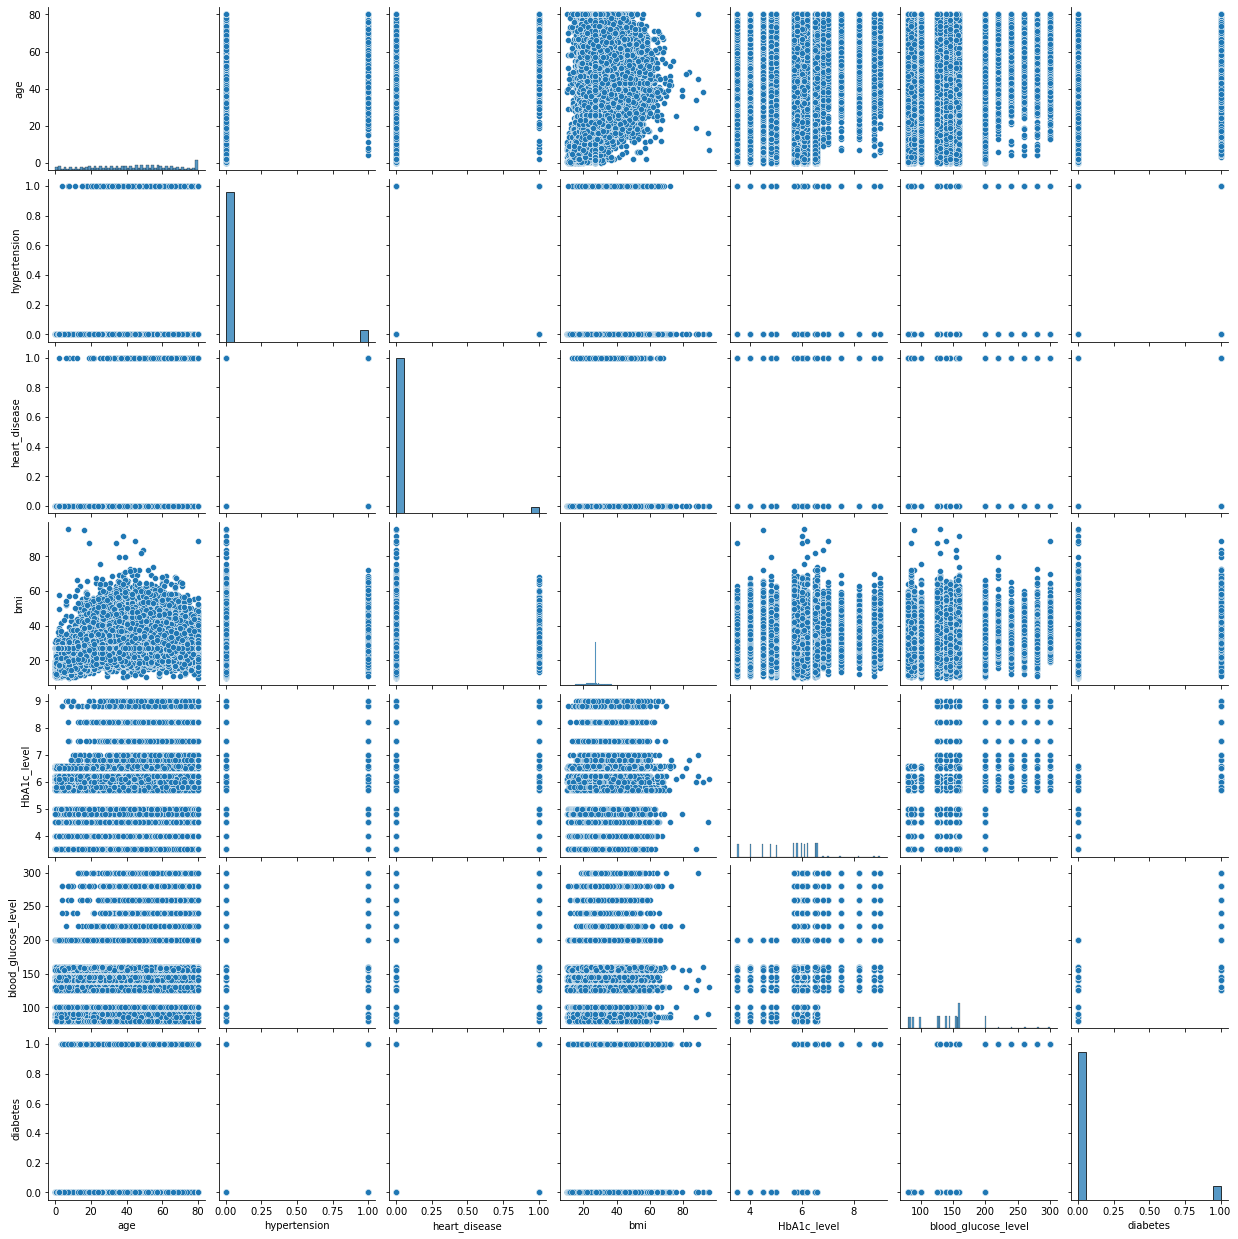

In [16]:
sns.pairplot(df)

#### Label Encoding

In [17]:
from sklearn import preprocessing   #chnaging the object datatype into int type
le=preprocessing.LabelEncoder()

list1=['gender','smoking_history']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
    
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


#### Statistical Summary

In [18]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


#### Correlation

In [19]:
corr=df.corr()
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<AxesSubplot:>

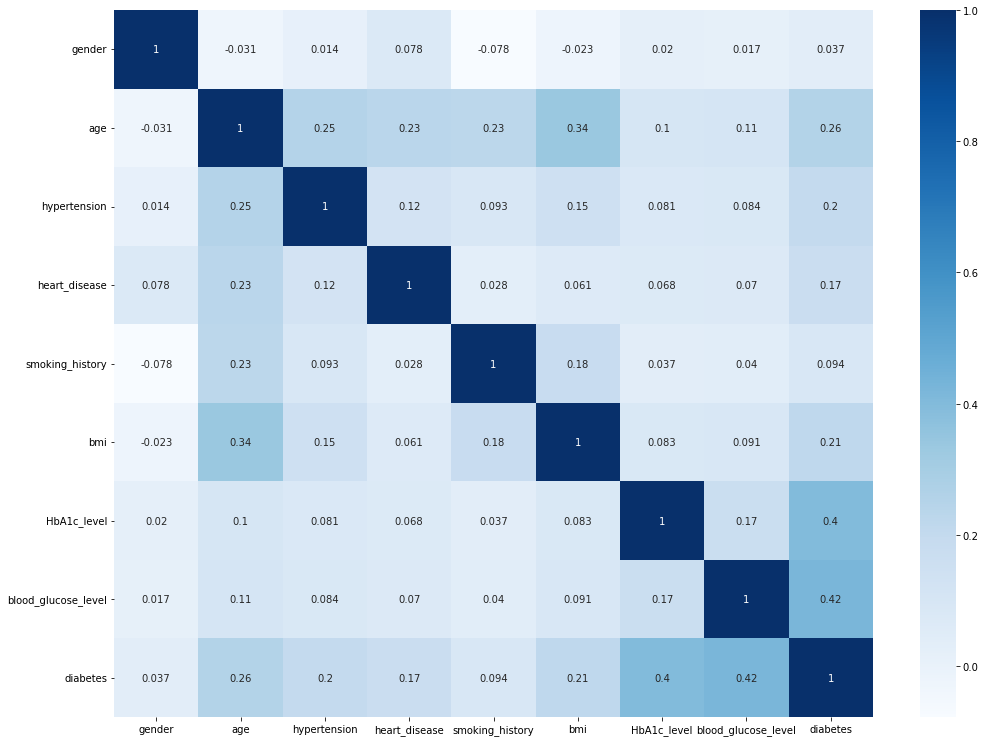

In [20]:
plt.figure(figsize=(17,13))  #correlation using heatmap
sns.heatmap(corr,cmap='Blues',annot=True)

In [21]:
corr['diabetes'].sort_values()

gender                 0.037411
smoking_history        0.094290
heart_disease          0.171727
hypertension           0.197823
bmi                    0.214357
age                    0.258008
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [22]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [23]:
#defining the dependent and independent variables
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

#### SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

0    91500
1    91500
Name: diabetes, dtype: int64

In [25]:
# putting the balanced dataset into a dataframe

df_new=pd.DataFrame(data=train_x)
df_new['diabetes']=train_y
df=df_new
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.000000,0,1,4,25.190000,6.600000,140,0
1,0,54.000000,0,0,0,27.320000,6.600000,80,0
2,1,28.000000,0,0,4,27.320000,5.700000,158,0
3,0,36.000000,0,0,1,23.450000,5.000000,155,0
4,1,76.000000,1,1,1,20.140000,4.800000,155,0
...,...,...,...,...,...,...,...,...,...
182995,1,47.578387,0,0,0,27.320000,6.537291,200,1
182996,0,61.000000,0,0,4,32.371787,6.168652,280,1
182997,0,14.000000,0,0,0,27.151124,6.808512,126,1
182998,1,56.463480,0,0,3,35.706547,7.643824,130,1


#### Checking the Skewness

In [26]:
df.skew()

gender                 0.569315
age                   -0.543806
hypertension           2.992030
heart_disease          4.508620
smoking_history       -0.276889
bmi                    1.068842
HbA1c_level            0.109090
blood_glucose_level    0.839628
diabetes               0.000000
dtype: float64

In [27]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

gender                 0.347363
age                   -0.251994
hypertension           3.231296
heart_disease          4.733872
smoking_history       -0.180936
bmi                    0.008152
HbA1c_level            0.001701
blood_glucose_level   -0.003524
dtype: float64

#### Plotting the Outliers

gender                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
age                     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
hypertension            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
heart_disease           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoking_history           AxesSubplot(0.125,0.518913;0.168478x0.16413)
bmi                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
HbA1c_level            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
blood_glucose_level    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
diabetes                  AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

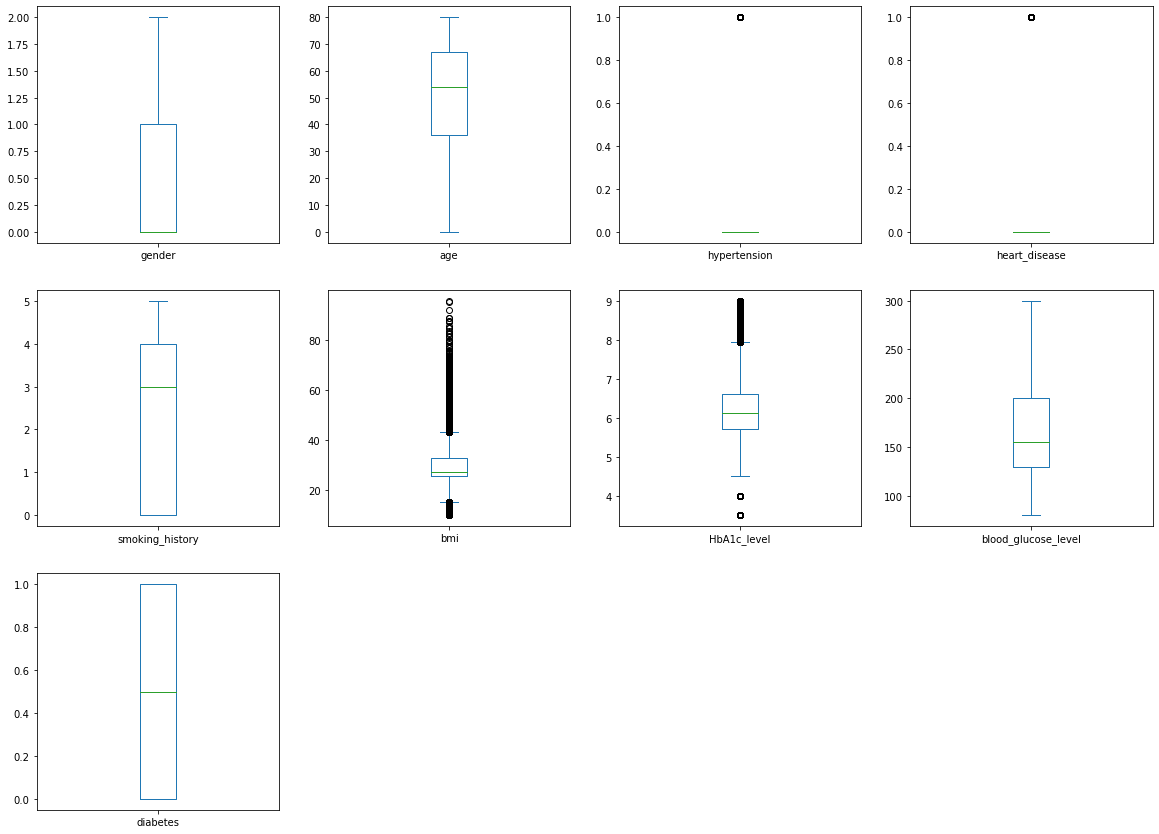

In [28]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

In [29]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([     0,      4,      4, ..., 182984, 182986, 182987], dtype=int64), array([3, 2, 3, ..., 2, 2, 3], dtype=int64))


(159180, 9)

In [30]:
#sepearting the dependent and independent varaibles
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### Creating the Machine Learning Model

In [31]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

#### finding the best random state

In [33]:
model=[lg,rdc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.888951710851447 on random state 47


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=.30)  #train-test split

#### Logistic Regression

In [35]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.888951710851447
Confusion Matrix:  
 [[22345  2660]
 [ 2643 20106]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     25005
           1       0.88      0.88      0.88     22749

    accuracy                           0.89     47754
   macro avg       0.89      0.89      0.89     47754
weighted avg       0.89      0.89      0.89     47754



#### Decision Tree Classifier

In [36]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.9774469154416384
Confusion Matrix:  
 [[24450   555]
 [  522 22227]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     25005
           1       0.98      0.98      0.98     22749

    accuracy                           0.98     47754
   macro avg       0.98      0.98      0.98     47754
weighted avg       0.98      0.98      0.98     47754



#### Random Forest Classifier

In [38]:
rdc.fit(x_train,y_train)
pred3=rdc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.9835825271181472
Confusion Matrix:  
 [[24693   312]
 [  472 22277]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     25005
           1       0.99      0.98      0.98     22749

    accuracy                           0.98     47754
   macro avg       0.98      0.98      0.98     47754
weighted avg       0.98      0.98      0.98     47754



#### KNeighbor Classifier

In [39]:
knc.fit(x_train,y_train)
pred4=knc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.9512710977090925
Confusion Matrix:  
 [[22802  2203]
 [  124 22625]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     25005
           1       0.91      0.99      0.95     22749

    accuracy                           0.95     47754
   macro avg       0.95      0.95      0.95     47754
weighted avg       0.95      0.95      0.95     47754



#### Cross Val Score

In [40]:
from sklearn.model_selection import cross_val_score
for i in range(3,8):
    cr=cross_val_score(dtc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  97.61465008166856
at cv=  4
cross val score =  97.63098379193366
at cv=  5
cross val score =  97.6856388993592
at cv=  6
cross val score =  97.6894082171127
at cv=  7
cross val score =  97.68061314235456


#### Hypermeter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['gini','entropy','log_loss'],
      'max_features':['sqrt','log2','auto'],
      'max_depth':[2,3,4,5]}

GCV=GridSearchCV(dtc,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8642207982577376

#### AUC ROC Curve

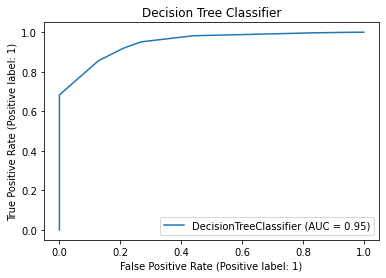

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Decision Tree Classifier')
plt.show()

#### Saving the Model

In [44]:
import pickle
filename='diabetes_pred.pkl'
pickle.dump(dtc, open(filename,'wb'))

#### Conclusion

In [45]:
a=np.array(y_test)
pred=np.array(GCV_pred)
Diabetes=pd.DataFrame({'Actual':a,'Predicted':pred})
Diabetes

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
47749,0,0
47750,1,1
47751,1,1
47752,0,0
